In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

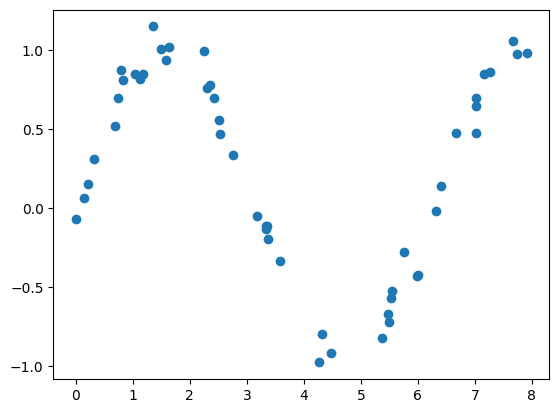

In [3]:
rng = np.random.RandomState(1)
x = 8 * rng.rand(50)
x.sort()
y = np.sin(x) + 0.1 * rng.randn(50)
x = x.reshape(-1,1)
y = y.reshape(-1,1)
plt.scatter(x, y)

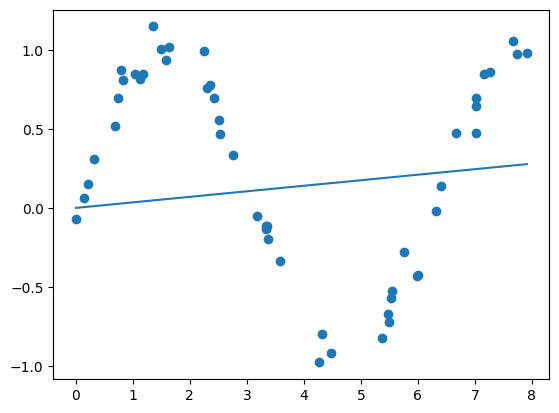

In [11]:


model = sm.OLS(y, x).fit()
ypred = model.predict(x) 

plt.scatter(x,y)
plt.plot(x,ypred)

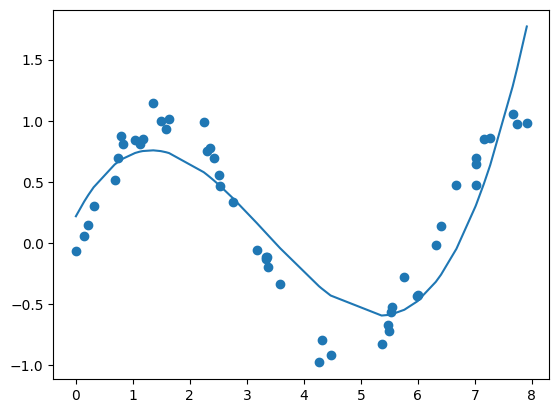

In [14]:
polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(x)
model = sm.OLS(y, xp).fit()
ypred2 = model.predict(xp)
plt.scatter(x,y)
plt.plot(x, ypred2)

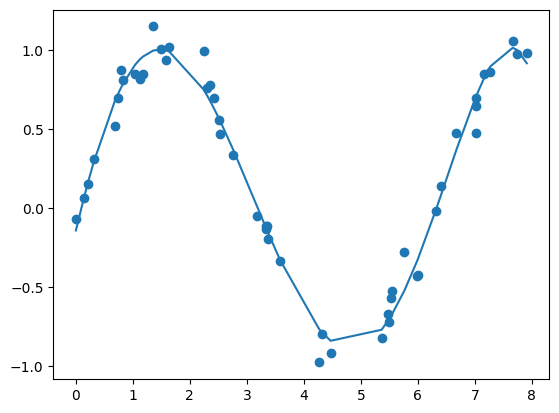

In [15]:
polynomial_features= PolynomialFeatures(degree=5)
xp5 = polynomial_features.fit_transform(x)
model = sm.OLS(y, xp5).fit()
ypred3 = model.predict(xp5)
plt.scatter(x,y)
plt.plot(x, ypred3)

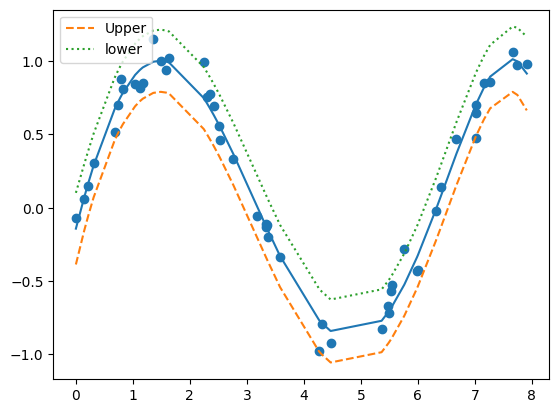

In [16]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

plt.scatter(x,y)
plt.plot(x, ypred3)
plt.plot(x,upper,'--',label="Upper") # confid. intrvl
plt.plot(x,lower,':',label="lower")
plt.legend(loc='upper left')

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     370.7
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           8.85e-35
Time:                        00:28:32   Log-Likelihood:                 46.855
No. Observations:                  50   AIC:                            -81.71
Df Residuals:                      44   BIC:                            -70.24
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1440      0.067     -2.153      0.037      -0.279      -0.009
x1             1.5245      0.175      8.723      0.000       1.172       1.877
x2            -0.4215      0.142     -2.976      0.005      -0.707      -0.136
x3            -0.1088      0.047     -2.327      0.025      -0.203      -0.015
x4             0.0382      0.007      5.741      0.000       0.025       0.052
x5            -0.0026      0.000     -7.643      0.000      -0.003      -0.002
==============================================================================
Omnibus:                        2.527   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                1.667
Skew:                           0.204   Prob(JB):                        0.435
Kurtosis:                       3.796   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""